# Course Performance Analysis - HarvardXMITx MOOC 


In [7]:
import pandas as pd

df = pd.read_csv('/Users/le/Desktop/2025 Spring/S022 computing and data science/022 final project/S022_R_Project/data/MOOC_cleaned.csv')  # Replace with your file path
print(df.head())

                    course_id       userid_DI  viewed  explored  certified  \
0  HarvardX/CB22x/2013_Spring  MHxPC130539455       1         0          0   
1  HarvardX/CB22x/2013_Spring  MHxPC130088379       1         0          0   
2  HarvardX/CB22x/2013_Spring  MHxPC130024894       1         0          0   
3  HarvardX/CB22x/2013_Spring  MHxPC130340959       1         0          0   
4  HarvardX/CB22x/2013_Spring  MHxPC130148402       0         0          0   

  final_cc_cname_DI      LoE_DI   YoB gender start_time_DI last_event_DI  \
0            France   Secondary  1989      m    2013-01-01    2013-05-14   
1     United States   Secondary  1993      m    2013-02-18    2013-03-17   
2     United States    Master's  1987      f    2013-01-24    2013-08-03   
3     United States  Bachelor's  1984      m    2013-02-11    2013-04-06   
4     United States   Secondary  1982      f    2012-12-23    2013-11-17   

   nforum_posts  nevents_log  nplay_video_log  ndays_act_log  grade_log  \

In [8]:
# Deep dive analysis for business insights
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from IPython.display import Image

# 1. Course Performance Analysis
course_performance = df.groupby('course_id').agg({
    'userid_DI': 'count',
    'viewed': 'sum', 
    'explored': 'sum',
    'certified': 'sum',
    'grade_log': 'mean',
    'ndays_act_log': 'mean'
}).round(2)

course_performance['view_rate'] = (course_performance['viewed'] / course_performance['userid_DI'] * 100).round(1)
course_performance['explore_rate'] = (course_performance['explored'] / course_performance['userid_DI'] * 100).round(1)
course_performance['cert_rate'] = (course_performance['certified'] / course_performance['userid_DI'] * 100).round(1)

print("Course Performance Comparison:")
print(course_performance[['userid_DI', 'view_rate', 'explore_rate', 'cert_rate', 'grade_log', 'ndays_act_log']])

Course Performance Comparison:
                             userid_DI  view_rate  explore_rate  cert_rate  \
course_id                                                                    
HarvardX/CB22x/2013_Spring       28593       56.8           1.9        1.3   
HarvardX/CS50x/2012             100759       41.3           8.9        1.3   
HarvardX/ER22x/2013_Spring       54721       58.7           6.5        4.3   
HarvardX/PH207x/2012_Fall        41271       58.8          10.5        4.5   
HarvardX/PH278x/2013_Spring      35494       42.3           3.3        2.0   

                             grade_log  ndays_act_log  
course_id                                              
HarvardX/CB22x/2013_Spring        0.01           1.32  
HarvardX/CS50x/2012               0.01           1.22  
HarvardX/ER22x/2013_Spring        0.03           1.30  
HarvardX/PH207x/2012_Fall         0.05           1.41  
HarvardX/PH278x/2013_Spring       0.02           1.22  


This code snippet aggregates and calculates performance metrics for different courses based on user interactions and outcomes.
- Grouped data by course ID
- Calculated total users, viewed, explored, certified counts
- Computed average grades and active days
- Calculated view, explore, and certification rates as percentages
- Printed the performance comparison for each course

# 2. Demographic Impact Analysis - Education Level vs Completion

In [9]:

edu_analysis = df.groupby('LoE_DI').agg({
    'userid_DI': 'count',
    'certified': 'sum',
    'explored': 'sum',
    'grade_log': 'mean',
    'nforum_posts': 'mean',
    'nevents_log': 'mean'
}).round(3)

edu_analysis['cert_rate'] = (edu_analysis['certified'] / edu_analysis['userid_DI'] * 100).round(2)
edu_analysis['explore_rate'] = (edu_analysis['explored'] / edu_analysis['userid_DI'] * 100).round(2)

print("Education Level Impact on Success:")
print(edu_analysis[['userid_DI', 'cert_rate', 'explore_rate', 'grade_log', 'nforum_posts', 'nevents_log']])

Education Level Impact on Success:
                     userid_DI  cert_rate  explore_rate  grade_log  \
LoE_DI                                                               
Bachelor's              105932       2.18          6.52      0.021   
Doctorate                 9095       3.22          8.18      0.032   
Less than Secondary       6382       3.21          8.85      0.025   
Master's                 66949       3.36          7.98      0.030   
Secondary                72480       2.07          6.96      0.018   

                     nforum_posts  nevents_log  
LoE_DI                                          
Bachelor's                  0.014        3.034  
Doctorate                   0.005        3.335  
Less than Secondary         0.039        3.191  
Master's                    0.015        3.227  
Secondary                   0.015        2.960  


This code snippet analyzes the impact of education level on user success metrics by aggregating data and calculating certification and exploration rates.
- Grouped data by education level.
- Aggregated user counts, certified completions, explorations, average grades, forum posts, and event logs.
- Calculated certification and exploration rates as percentages.
- Printed the results for analysis.

# 3. Age Impact Analysis

In [10]:

df['age_at_enrollment'] = 2013 - df['YoB']  # Assuming most courses were in 2013
df['age_group'] = pd.cut(df['age_at_enrollment'], 
                        bins=[0, 25, 35, 45, 55, 100], 
                        labels=['18-25', '26-35', '36-45', '46-55', '55+'])

age_analysis = df.groupby('age_group').agg({
    'userid_DI': 'count',
    'certified': 'sum',
    'explored': 'sum',
    'grade_log': 'mean',
    'ndays_act_log': 'mean'
}).round(3)

age_analysis['cert_rate'] = (age_analysis['certified'] / age_analysis['userid_DI'] * 100).round(2)
age_analysis['explore_rate'] = (age_analysis['explored'] / age_analysis['userid_DI'] * 100).round(2)

print("Age Group Performance Analysis:")
print(age_analysis[['userid_DI', 'cert_rate', 'explore_rate', 'grade_log', 'ndays_act_log']])

Age Group Performance Analysis:
           userid_DI  cert_rate  explore_rate  grade_log  ndays_act_log
age_group                                                              
18-25         113138       2.34          6.84      0.020          1.240
26-35          99167       2.77          7.40      0.026          1.300
36-45          29699       2.62          7.39      0.023          1.311
46-55          11746       1.99          6.60      0.019          1.327
55+             7088       2.24          7.87      0.022          1.434


/var/folders/1g/64wnk_m11h97jbqls6s02vmh0000gn/T/ipykernel_60993/1145381924.py:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



# 4. Geographic Performance Analysis - Top 10 Countries

In [11]:

geo_analysis = df.groupby('final_cc_cname_DI').agg({
    'userid_DI': 'count',
    'certified': 'sum',
    'explored': 'sum',
    'grade_log': 'mean',
    'ndays_act_log': 'mean'
}).round(3)

geo_analysis['cert_rate'] = (geo_analysis['certified'] / geo_analysis['userid_DI'] * 100).round(2)
geo_analysis = geo_analysis.sort_values('userid_DI', ascending=False).head(10)

print("Top 10 Countries by Enrollment - Performance Analysis:")
print(geo_analysis[['userid_DI', 'cert_rate', 'grade_log', 'ndays_act_log']])

Top 10 Countries by Enrollment - Performance Analysis:
                                userid_DI  cert_rate  grade_log  ndays_act_log
final_cc_cname_DI                                                             
United States                       79953       1.96      0.018          1.275
Unknown/Other                       42015       0.07      0.002          1.240
India                               25277       3.87      0.036          1.293
Other Europe                        16096       4.50      0.037          1.353
Other Africa                        10497       3.51      0.036          1.331
United Kingdom                       9571       3.93      0.033          1.301
Brazil                               7356       2.92      0.024          1.245
Canada                               6109       2.41      0.023          1.285
Other Middle East/Central Asia       5957       2.45      0.023          1.218
Other South Asia                     5589       3.54      0.031          1.2

This code snippet aggregates user performance data by country and identifies the top 10 countries based on enrollment metrics.
- Group data by country name
- Aggregate user counts, certifications, explorations, average grades, and active days
- Calculate certification rate as a percentage
- Sort countries by user count and select the top 10
- Print the relevant performance metrics for these countries

# 5. Age Impact Analysis

In [12]:
df['age_at_enrollment'] = 2013 - df['YoB']  # Assuming most courses were in 2013
df['age_group'] = pd.cut(df['age_at_enrollment'], 
                        bins=[0, 25, 35, 45, 55, 100], 
                        labels=['18-25', '26-35', '36-45', '46-55', '55+'])

age_analysis = df.groupby('age_group').agg({
    'userid_DI': 'count',
    'certified': 'sum',
    'explored': 'sum',
    'grade_log': 'mean',
    'ndays_act_log': 'mean'
}).round(3)

age_analysis['cert_rate'] = (age_analysis['certified'] / age_analysis['userid_DI'] * 100).round(2)
age_analysis['explore_rate'] = (age_analysis['explored'] / age_analysis['userid_DI'] * 100).round(2)

print("Age Group Performance Analysis:")
print(age_analysis[['userid_DI', 'cert_rate', 'explore_rate', 'grade_log', 'ndays_act_log']])

Age Group Performance Analysis:
           userid_DI  cert_rate  explore_rate  grade_log  ndays_act_log
age_group                                                              
18-25         113138       2.34          6.84      0.020          1.240
26-35          99167       2.77          7.40      0.026          1.300
36-45          29699       2.62          7.39      0.023          1.311
46-55          11746       1.99          6.60      0.019          1.327
55+             7088       2.24          7.87      0.022          1.434


/var/folders/1g/64wnk_m11h97jbqls6s02vmh0000gn/T/ipykernel_60993/2344070890.py:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



This code snippet analyzes the performance of different age groups in a dataset by calculating certification rates, exploration rates, average grades, and average active days.
- Calculated age at enrollment based on year of birth.
- Categorized ages into defined age groups.
- Grouped data by age group and aggregated performance metrics.
- Calculated certification and exploration rates as percentages.
- Printed the performance analysis for each age group.

# 6. Engagement Pattern Analysis - What drives certification?

In [13]:
# Create engagement segments based on activity levels
df['engagement_score'] = (df['nforum_posts'] + df['nplay_video_log'] + df['ndays_act_log']).fillna(0)
df['engagement_segment'] = pd.cut(df['engagement_score'], 
                                 bins=[-1, 0, 2, 5, 100], 
                                 labels=['No Activity', 'Low', 'Medium', 'High'])

engagement_analysis = df.groupby('engagement_segment').agg({
    'userid_DI': 'count',
    'certified': 'sum',
    'explored': 'sum',
    'grade_log': 'mean'
}).round(3)

engagement_analysis['cert_rate'] = (engagement_analysis['certified'] / engagement_analysis['userid_DI'] * 100).round(2)
engagement_analysis['explore_rate'] = (engagement_analysis['explored'] / engagement_analysis['userid_DI'] * 100).round(2)

print("Engagement Level vs Success Rates:")
print(engagement_analysis[['userid_DI', 'cert_rate', 'explore_rate', 'grade_log']])

Engagement Level vs Success Rates:
                    userid_DI  cert_rate  explore_rate  grade_log
engagement_segment                                               
No Activity                 0        NaN           NaN        NaN
Low                    115334       0.01          0.86      0.000
Medium                  98462       0.54          4.37      0.007
High                    47042      12.80         28.27      0.111


/var/folders/1g/64wnk_m11h97jbqls6s02vmh0000gn/T/ipykernel_60993/1323977615.py:7: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



This code segment analyzed user engagement levels and their correlation with certification success rates by segmenting users based on their activity scores.
- Calculated engagement score based on forum posts, video plays, and active days.
- Categorized users into engagement segments (No Activity, Low, Medium, High).
- Grouped data by engagement segment to aggregate user counts, certifications, explorations, and average grades.
- Calculated certification and exploration rates as percentages of total users in each segment.

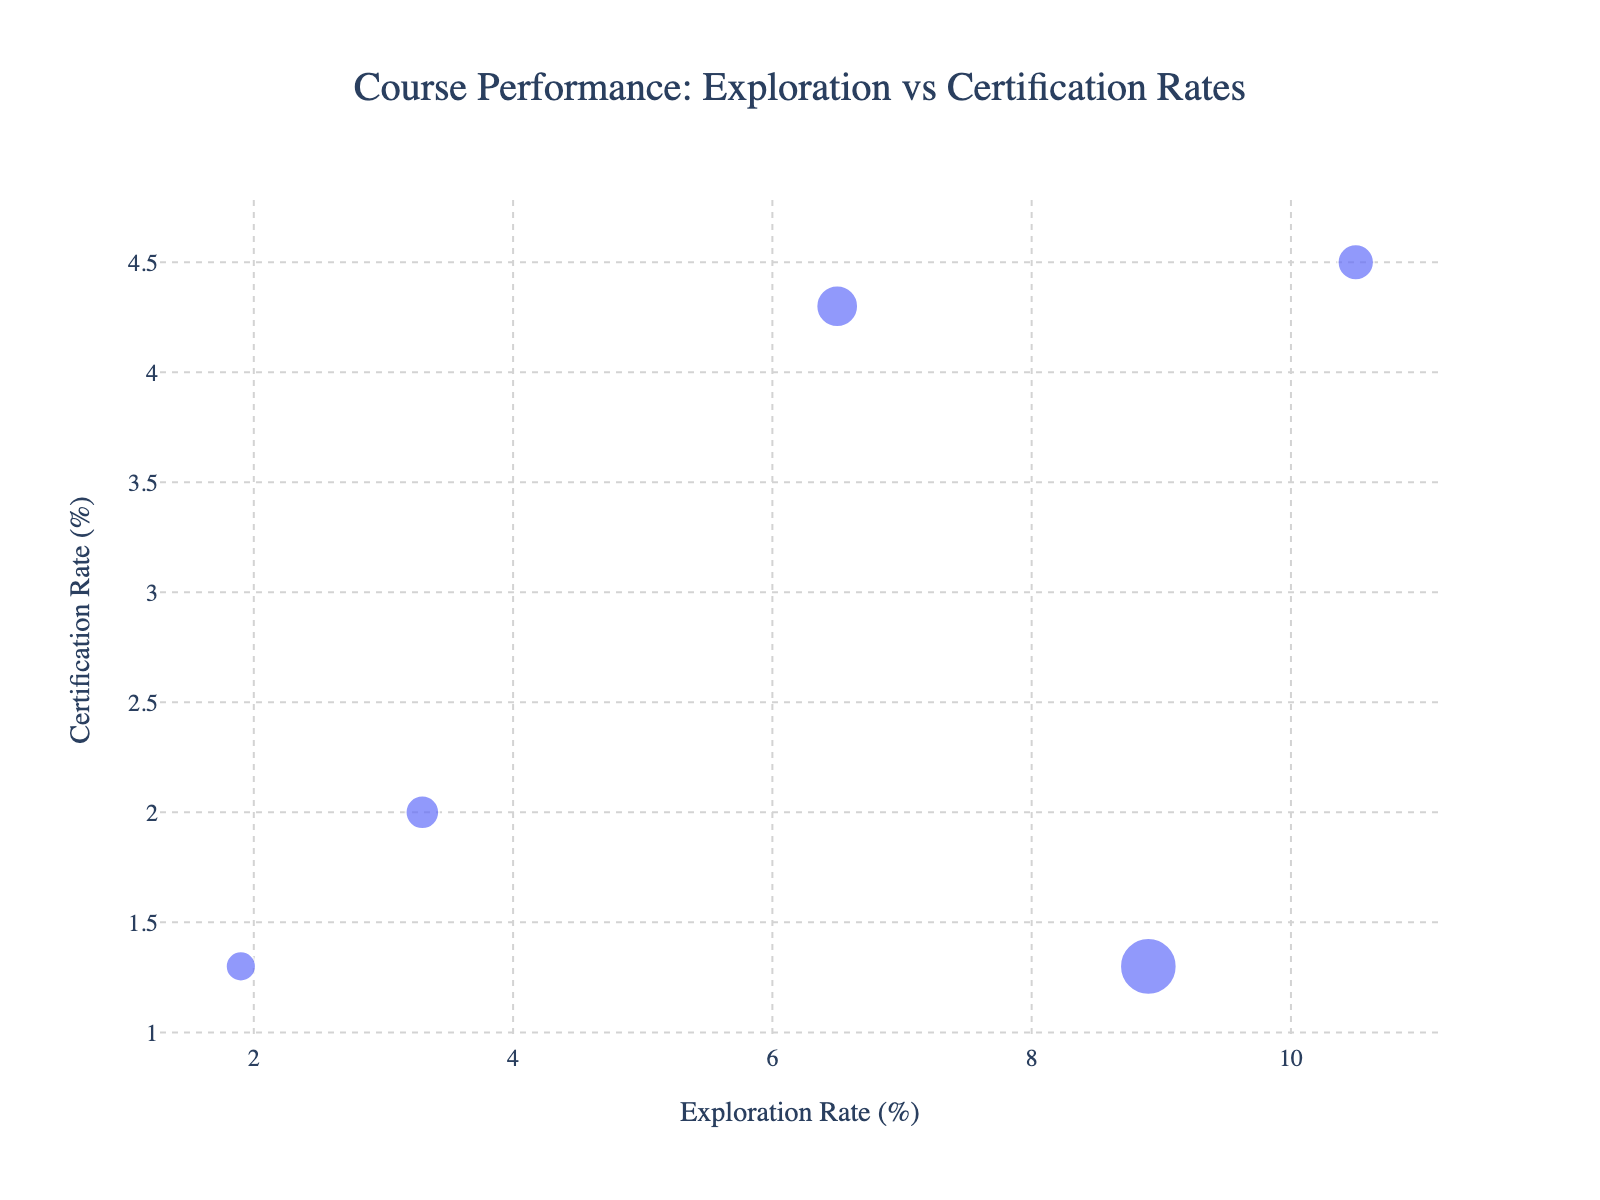

In [14]:
# Create visualization showing course performance comparison
fig = px.scatter(course_performance.reset_index(), 
                x='explore_rate', 
                y='cert_rate',
                size='userid_DI',
                hover_data=['view_rate', 'grade_log'],
                title='Course Performance: Exploration vs Certification Rates',
                labels={'explore_rate': 'Exploration Rate (%)', 
                       'cert_rate': 'Certification Rate (%)',
                       'userid_DI': 'Total Enrollments'})

fig.update_layout(
    font_family="Inter",
    title_font_size=20,
    title_x=0.5,
    showlegend=True,
    plot_bgcolor='white',
    paper_bgcolor='white'
)

fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgray', griddash='dot')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray', griddash='dot')

png_bytes = pio.to_image(fig, format='png', width=800, height=600, scale=2)
display(Image(png_bytes))

The above code generates a scatter plot to compare exploration and certification rates of courses, highlighting total enrollments.
- Reset index of course performance data
- Create a scatter plot with exploration rate on x-axis and certification rate on y-axis
- Size points based on total enrollments
- Include hover data for view rate and grade log
- Customize layout and appearance of the plot
- Convert the plot to a PNG image and display it



# 7. Create engagement funnel visualization


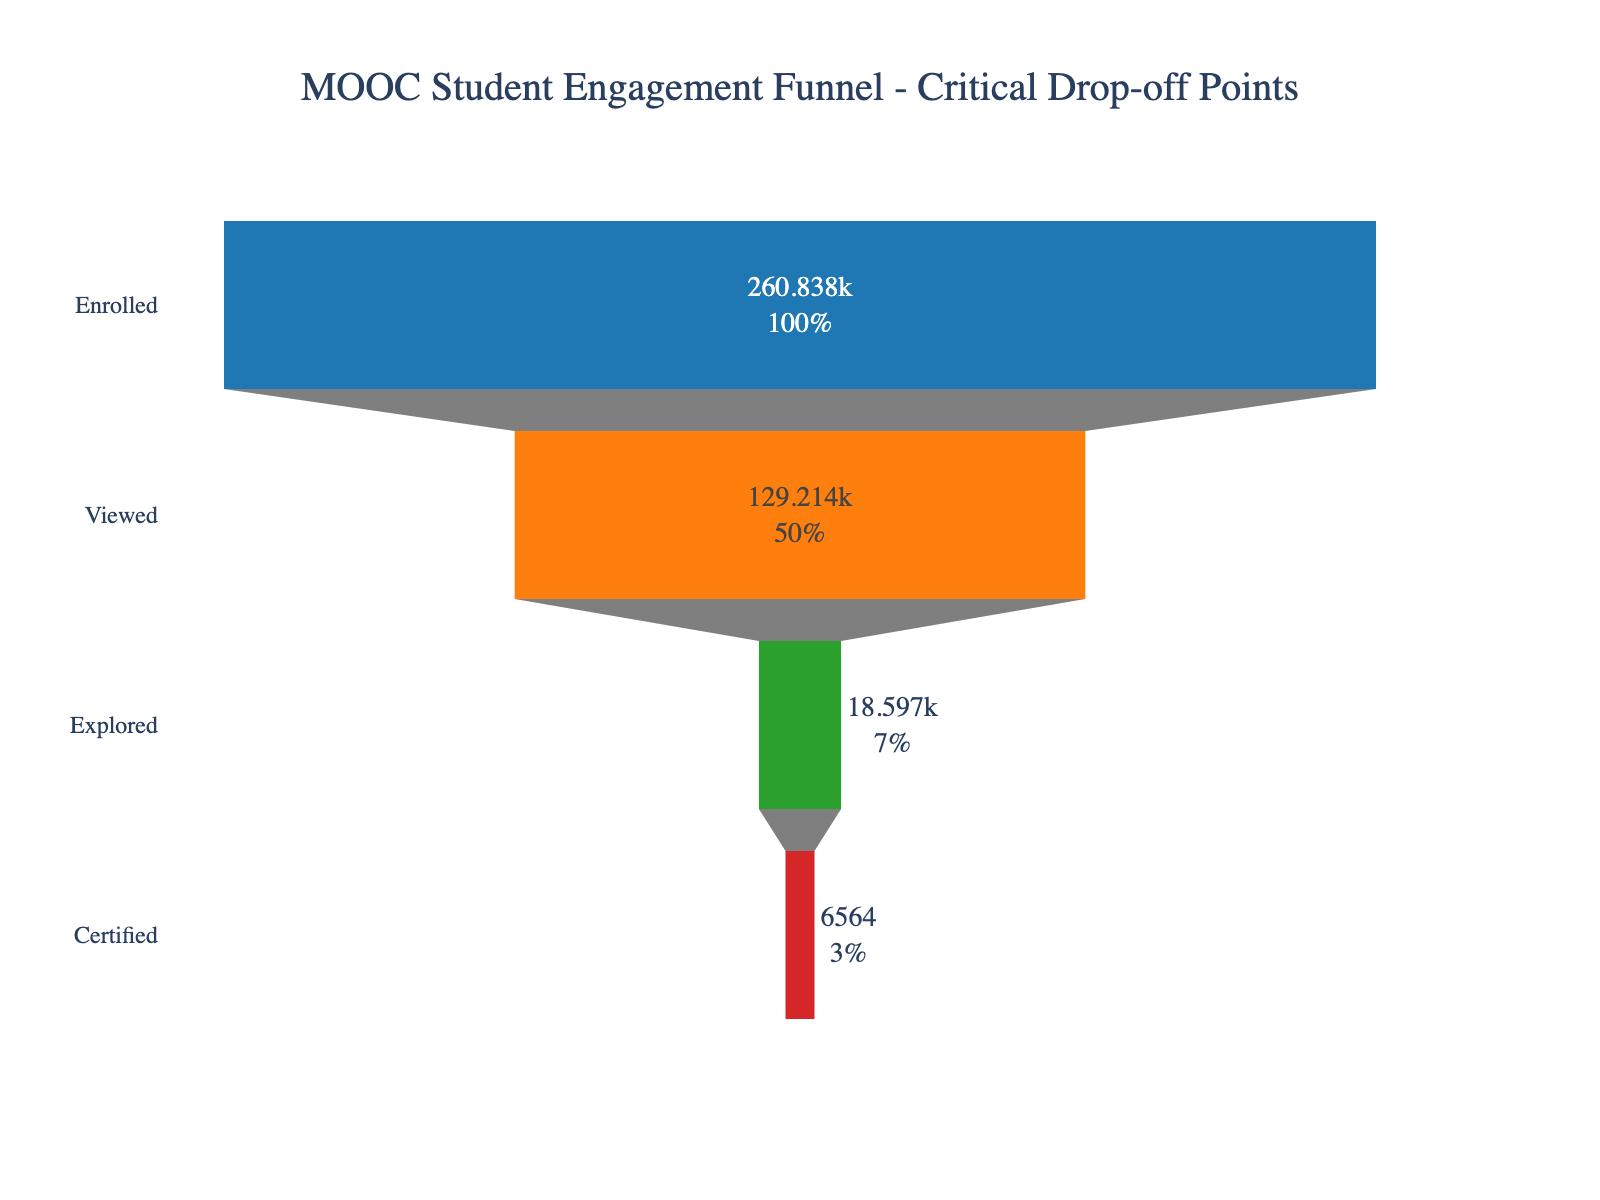

In [15]:
# Create engagement funnel visualization
engagement_data = pd.DataFrame({
    'Stage': ['Enrolled', 'Viewed', 'Explored', 'Certified'],
    'Count': [260838, 129214, 18597, 6564],
    'Percentage': [100, 49.5, 7.1, 2.5]
})

fig = go.Figure(go.Funnel(
    y = engagement_data['Stage'],
    x = engagement_data['Count'],
    textinfo = "value+percent initial",
    textfont_size=14,
    marker_color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
))

fig.update_layout(
    title='MOOC Student Engagement Funnel - Critical Drop-off Points',
    font_family="Inter",
    title_font_size=20,
    title_x=0.5,
    plot_bgcolor='white',
    paper_bgcolor='white'
)

png_bytes = pio.to_image(fig, format='png', width=800, height=600, scale=2)
display(Image(png_bytes))

This code snippet generates a funnel chart to visualize the engagement stages of MOOC students and their respective drop-off rates.
- Define engagement data with stages, counts, and percentages.
- Create a funnel chart using Plotly with specified stages and counts.
- Customize the layout and appearance of the chart.
- Convert the chart to a PNG image and display it.